<a href="https://colab.research.google.com/github/Rishitha-8/Fuel_efficiency_prediction/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install -q seaborn
import seaborn as sns


In [31]:
raw_dataset = pd.read_csv("/content/mpg.csv",encoding='unicode_escape')


In [32]:
dataset=raw_dataset
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,1,ford torino
...,...,...,...,...,...,...,...,...,...
3026,30.5,4,97.0,78,2190,14.2,2021,2,Skoda Rapid
3027,22.0,6,146.0,97,2815,14.6,2021,3,Hyunda I20
3028,21.5,4,121.0,110,2600,12.9,2021,2,Mercedes G Class
3029,21.5,3,80.0,110,2720,13.6,2021,3,Skoda Yeti


In [33]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'],errors = 'coerce')

In [34]:
dataset.drop_duplicates(inplace=True)

In [35]:
dataset['horsepower'] = dataset['horsepower'].fillna(dataset['horsepower'].mean())

In [36]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000
mean,23.250479,5.486299,195.474084,105.250000,2986.079234,15.568802,2013.551007,1.563882
std,7.743316,1.708697,105.116981,38.635089,853.759669,2.763220,422.105328,0.795647
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,1.000000
25%,17.000000,4.000000,105.000000,76.000000,2227.000000,13.700000,1990.000000,1.000000
50%,22.000000,4.000000,151.000000,95.000000,2830.000000,15.500000,2008.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3631.000000,17.100000,2018.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5141.000000,24.900000,19751.000000,3.000000


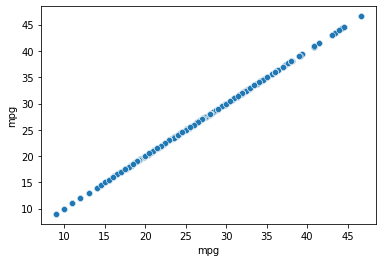

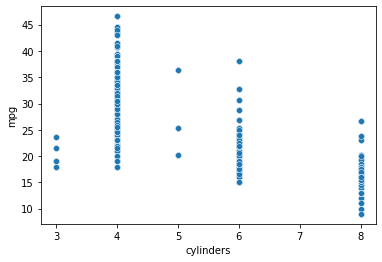

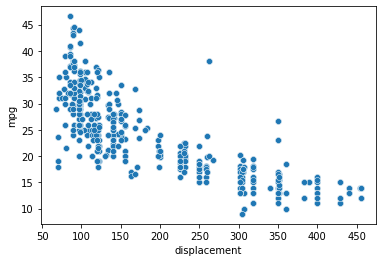

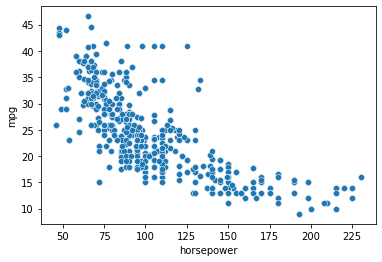

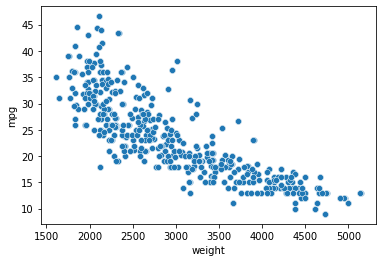

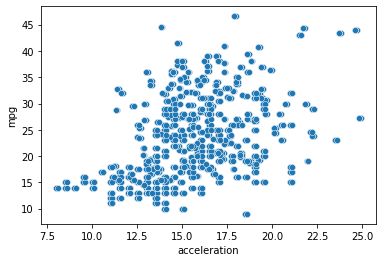

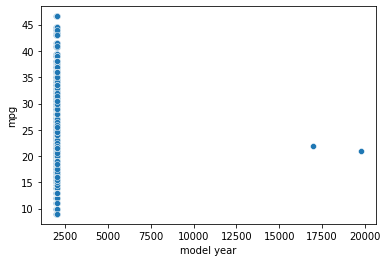

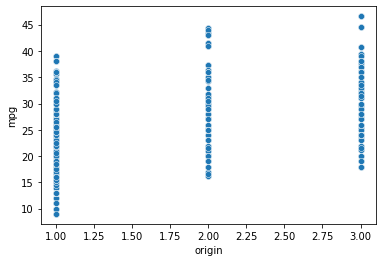

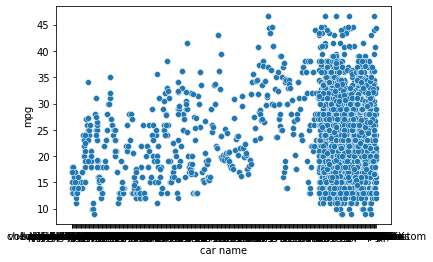

In [37]:
for col in dataset.columns:
  sns.scatterplot(x=col,y='mpg',data=dataset)
  plt.show()
  

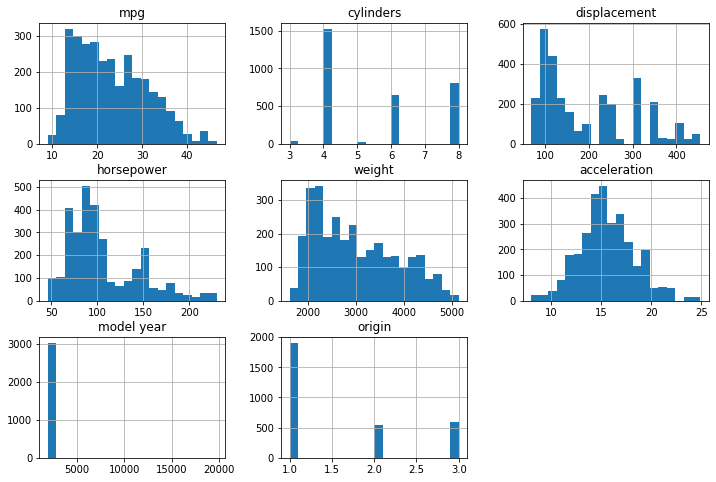

In [38]:
dataset.hist(figsize=(12,8),bins=20)
plt.show()

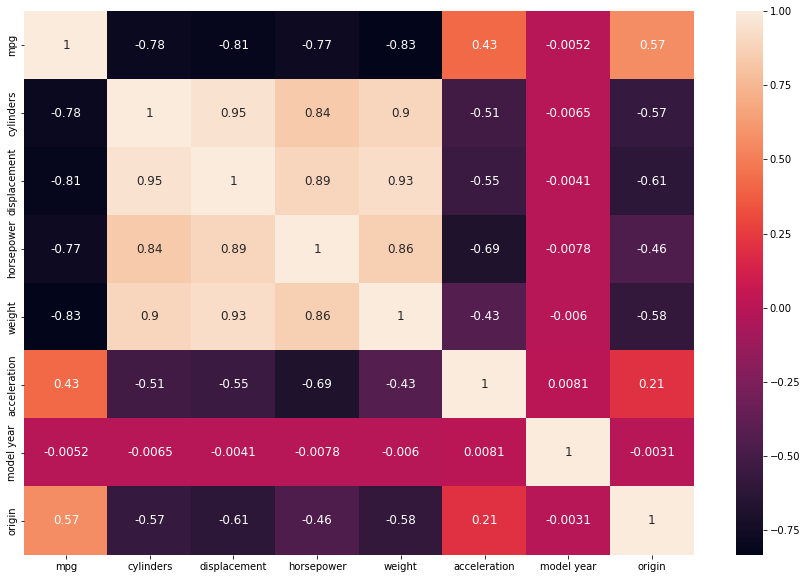

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,annot_kws={"size":12})

In [40]:
dataset=dataset.drop(columns=['car name'])

In [41]:
dataset.to_csv('final_data.csv',index=False)

In [42]:
#dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [43]:
#dataset = pd.get_dummies(dataset, columns=['origin'], prefix='', prefix_sep='')

In [44]:
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['mpg'])
y=dataset['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
Test_data = [[8,350.0,165,3693,11.5,1970,	1	]]
pre=model.predict(Test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [47]:
pre

array([15.])

In [48]:
pred=model.predict(X_test)

In [49]:
output=pd.DataFrame({'Real':y_test.reshape(-1), 'Predict':pred.reshape(-1)})
output

,Real,Predict
0,24.3,24.3
1,25.1,25.1
2,24.2,24.2
3,19.0,19.0
4,13.0,13.0
...,...,...
601,21.0,21.0
602,29.0,29.0
603,13.0,13.0
604,28.0,28.0


In [50]:
print('accuracy',r2_score(y_test,pred))

accuracy 0.999400387873031


In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,average_precision_score
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,pred)))
print('Mean Absolute Error: {}\n'.format(mean_absolute_error(y_test,pred)))
print('Mean Absolute Percentage Error: {}\n'.format(mean_absolute_percentage_error(y_test,pred)))

Train score: 0.9999091966907173

Test score: 0.999400387873031

Overall model accuracy: 0.999400387873031

Mean Squared Error: 0.03252475247524753

Mean Absolute Error: 0.015016501650165113

Mean Absolute Percentage Error: 0.0008798358827479423



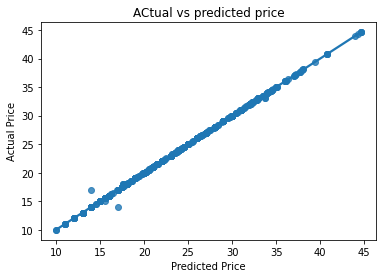

In [52]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price",)
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [53]:
import pickle
pickle.dump(model, open('model.pkl','wb'))